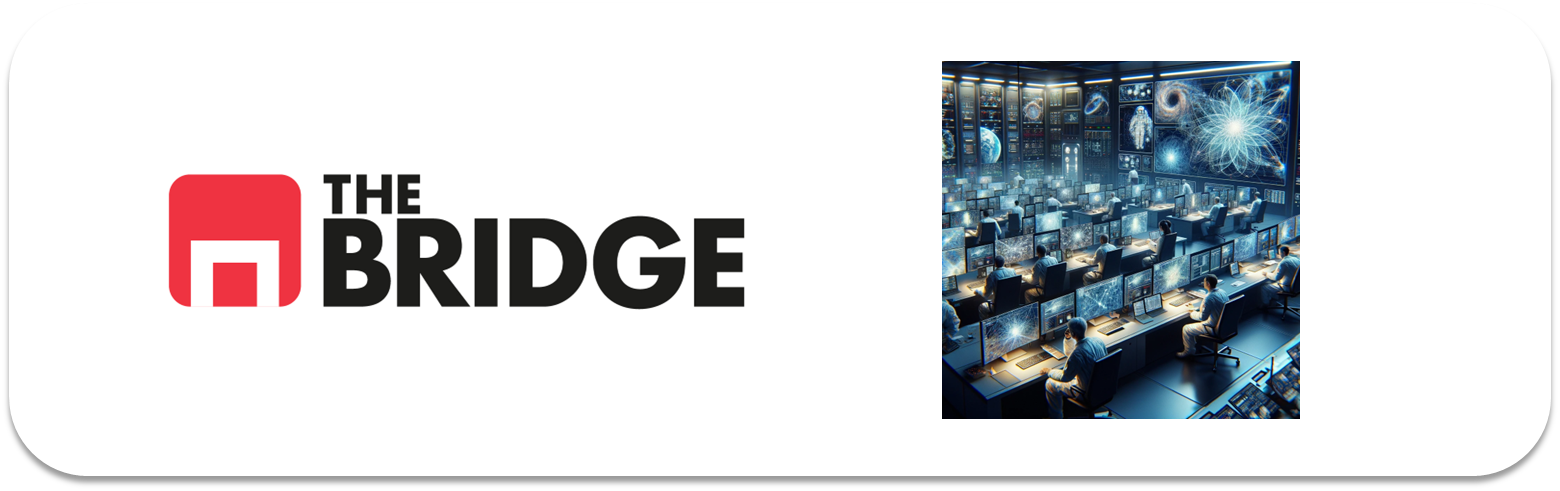

## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf



from skimage.io import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from PIL import Image
from sklearn.preprocessing import LabelEncoder

### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



C:\Users\PC ELITE\AppData\Local\Temp\ipykernel_29596\949800258.py:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(64, 64, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.7026 - loss: 0.8644 - val_accuracy: 0.8176 - val_loss: 0.5181
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8343 - loss: 0.4538 - val_accuracy: 0.8219 - val_loss: 0.4955
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8675 - loss: 0.3686 - val_accuracy: 0.8201 - val_loss: 0.5170
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8871 - loss: 0.3052 - val_accuracy: 0.8215 - val_loss: 0.5044
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9113 - loss: 0.2461 - val_accuracy: 0.8272 - val_loss: 0.5469
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9205 - loss: 0.2152 - val_accuracy: 0.8115 - val_loss: 0.5854
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9323 - loss: 0.1855 - val_accuracy: 0.8105 - val_loss: 0.6364
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms

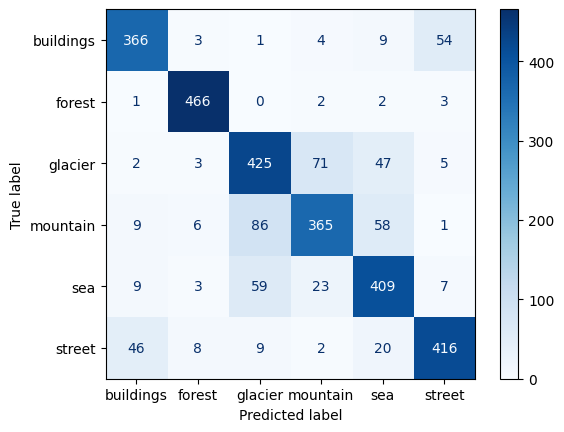

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 28s 53ms/step - accuracy: 0.4701 - loss: 3.5466 - val_accuracy: 0.8016 - val_loss: 0.9324
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.6031 - loss: 1.7294 - val_accuracy: 0.8105 - val_loss: 0.8942
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.6614 - loss: 1.2904 - val_accuracy: 0.7994 - val_loss: 0.8987
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.6894 - loss: 1.0978 - val_accuracy: 0.7923 - val_loss: 0.8690
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.7090 - loss: 1.0049 - val_accuracy: 0.7788 - val_loss: 0.8387
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.7251 - loss: 0.8609 - val_accuracy: 0.7727 - val_loss: 0.8178
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.7398 - loss: 0.8140 - val_accuracy: 0.7798 - val_loss: 0.7775
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.7513 - loss: 0.7546 - 

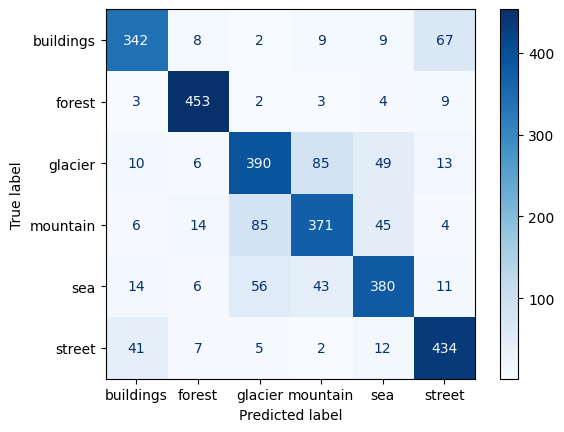

In [3]:

# Definir las rutas de los datos
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"

# Función para leer los datos
def read_data(directorio, reshape_dim=(64, 64)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):
                image = Image.open('/'.join([directorio, folder, file]))
                image = image.resize(reshape_dim)  # Redimensionamos las imágenes a 64x64
                image = np.array(image)

                X.append(image)
                y.append(folder)

    return np.array(X), np.array(y)

# Cargar los datos
X_train, y_train = read_data(TRAIN_PATH)
X_test, y_test = read_data(TEST_PATH)

# Normalizar las características
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Dividir los datos de entrenamiento en entrenamiento y validación
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_normalized, y_train_encoded, test_size=0.2, random_state=42)

# Cargar el modelo preentrenado (MobileNetV2 en este caso)
base_model = tf.keras.applications.MobileNetV2(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Añadir una nueva cabeza al modelo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 clases de paisajes
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con transfer learning
history_transfer = model.fit(X_train_final, y_train_final, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluar el modelo con los datos de test
test_loss_transfer, test_accuracy_transfer = model.evaluate(X_test_normalized, y_test_encoded)
print(f"Test Loss (Transfer Learning): {test_loss_transfer}")
print(f"Test Accuracy (Transfer Learning): {test_accuracy_transfer}")

# Mostrar el reporte de clasificación y la matriz de confusión
y_pred_transfer = model.predict(X_test_normalized)
y_pred_classes_transfer = np.argmax(y_pred_transfer, axis=1)

print("Classification Report (Transfer Learning):")
print(classification_report(y_test_encoded, y_pred_classes_transfer, target_names=label_encoder.classes_))

ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_classes_transfer, display_labels=label_encoder.classes_, cmap=plt.cm.Blues)
plt.show()

# Fine-tuning: Descongelar algunas capas del modelo base y volver a entrenar
base_model.trainable = True
fine_tune_at = len(base_model.layers) // 2

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compilar el modelo nuevamente
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con fine-tuning
history_fine_tuning = model.fit(X_train_final, y_train_final, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluar el modelo con los datos de test
test_loss_fine_tuning, test_accuracy_fine_tuning = model.evaluate(X_test_normalized, y_test_encoded)
print(f"Test Loss (Fine Tuning): {test_loss_fine_tuning}")
print(f"Test Accuracy (Fine Tuning): {test_accuracy_fine_tuning}")

# Mostrar el reporte de clasificación y la matriz de confusión
y_pred_fine_tuning = model.predict(X_test_normalized)
y_pred_classes_fine_tuning = np.argmax(y_pred_fine_tuning, axis=1)

print("Classification Report (Fine Tuning):")
print(classification_report(y_test_encoded, y_pred_classes_fine_tuning, target_names=label_encoder.classes_))

ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_classes_fine_tuning, display_labels=label_encoder.classes_, cmap=plt.cm.Blues)
plt.show()

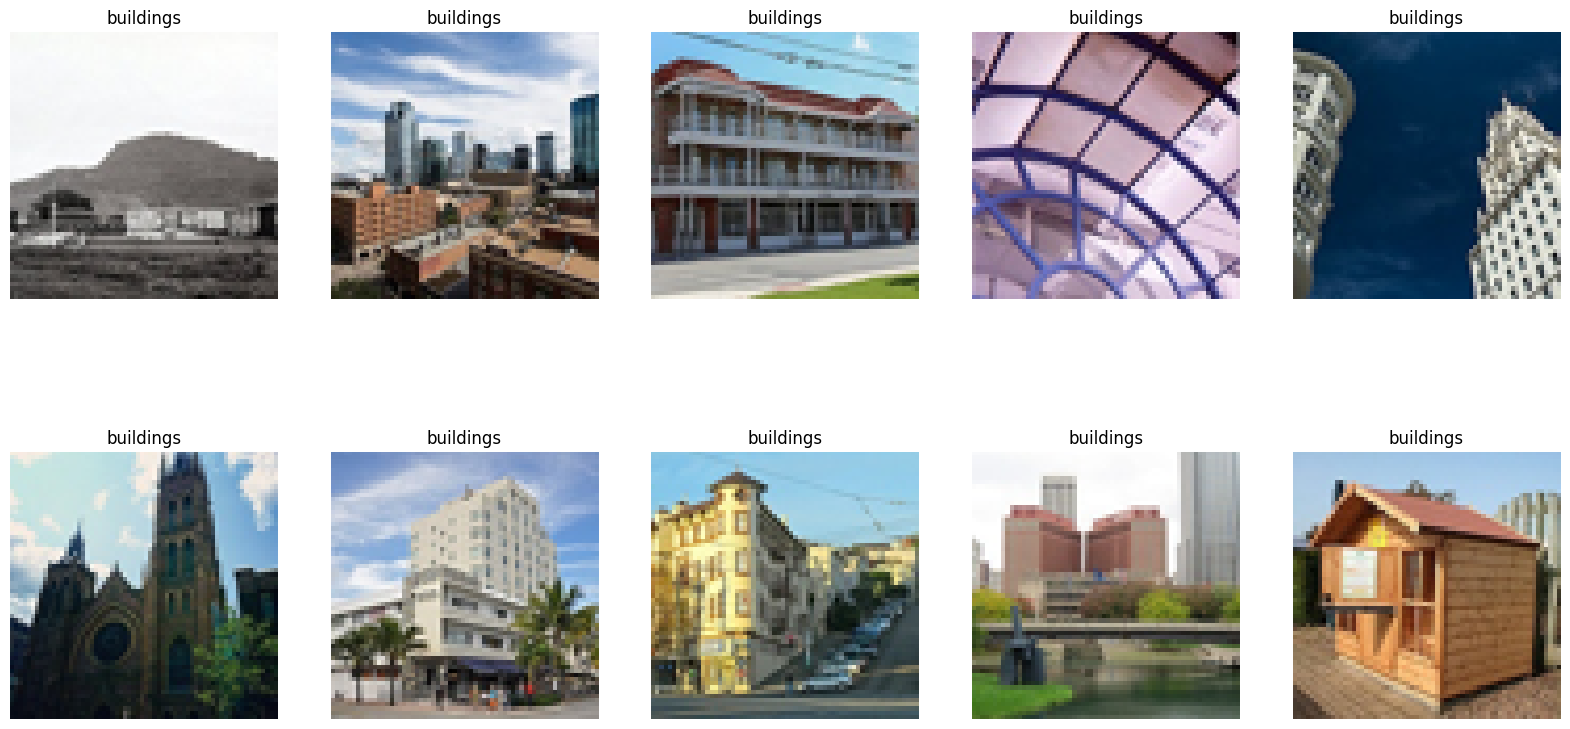

In [4]:
# Función para mostrar imágenes con sus etiquetas
def show_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

# Mostrar algunas imágenes de entrenamiento
class_names = label_encoder.classes_
show_images(X_train, y_train_encoded, class_names)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 89s 251ms/step - accuracy: 0.5984 - loss: 1.0478 - val_accuracy: 0.7606 - val_loss: 0.6528
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 87s 249ms/step - accuracy: 0.7467 - loss: 0.6617 - val_accuracy: 0.7770 - val_loss: 0.6162
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 89s 254ms/step - accuracy: 0.7624 - loss: 0.6125 - val_accuracy: 0.7898 - val_loss: 0.5690
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 87s 247ms/step - accuracy: 0.7775 - loss: 0.5898 - val_accuracy: 0.7734 - val_loss: 0.6012
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 87s 248ms/step - accuracy: 0.7818 - loss: 0.5608 - val_accuracy: 0.7941 - val_loss: 0.5620
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 87s 247ms/step - accuracy: 0.7951 - loss: 0.5509 - val_accuracy: 0.8037 - val_loss: 0.5414
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 87s 247ms/step - accuracy: 0.8020 - loss: 0.5257 - val_accuracy: 0.7984 - val_loss: 0.5397
Epoch 8/10
351/351 ━━━━━━━━━━━━

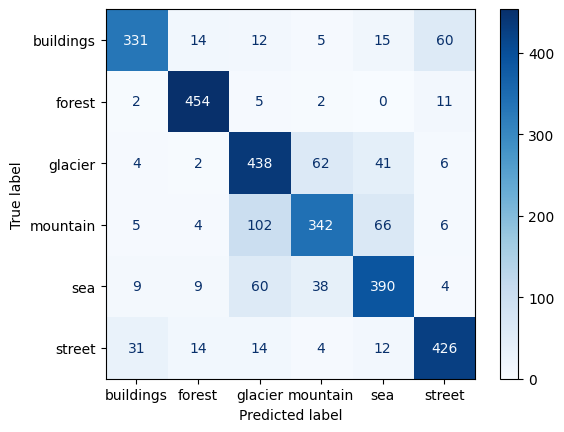

In [5]:
# Cargar el modelo preentrenado (VGG19 en este caso)
base_model_vgg19 = tf.keras.applications.VGG19(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
base_model_vgg19.trainable = False

# Añadir una nueva cabeza al modelo
model_vgg19 = models.Sequential([
    base_model_vgg19,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 clases de paisajes
])

# Compilar el modelo
model_vgg19.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con transfer learning
history_transfer_vgg19 = model_vgg19.fit(X_train_final, y_train_final, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluar el modelo con los datos de test
test_loss_transfer_vgg19, test_accuracy_transfer_vgg19 = model_vgg19.evaluate(X_test_normalized, y_test_encoded)
print(f"Test Loss (Transfer Learning VGG19): {test_loss_transfer_vgg19}")
print(f"Test Accuracy (Transfer Learning VGG19): {test_accuracy_transfer_vgg19}")

# Mostrar el reporte de clasificación y la matriz de confusión
y_pred_transfer_vgg19 = model_vgg19.predict(X_test_normalized)
y_pred_classes_transfer_vgg19 = np.argmax(y_pred_transfer_vgg19, axis=1)

print("Classification Report (Transfer Learning VGG19):")
print(classification_report(y_test_encoded, y_pred_classes_transfer_vgg19, target_names=label_encoder.classes_))

ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_classes_transfer_vgg19, display_labels=label_encoder.classes_, cmap=plt.cm.Blues)
plt.show()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.5205 - loss: 1.2792 - val_accuracy: 0.7300 - val_loss: 0.6963
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7268 - loss: 0.7303 - val_accuracy: 0.7524 - val_loss: 0.6686
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7664 - loss: 0.6240 - val_accuracy: 0.7602 - val_loss: 0.6442
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7909 - loss: 0.5664 - val_accuracy: 0.7716 - val_loss: 0.6412
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8175 - loss: 0.4940 - val_accuracy: 0.7681 - val_loss: 0.6537
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8315 - loss: 0.4534 - val_accuracy: 0.7663 - val_loss: 0.6663
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8400 - loss: 0.4341 - val_accuracy: 0.7731 - val_loss: 0.6640
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━

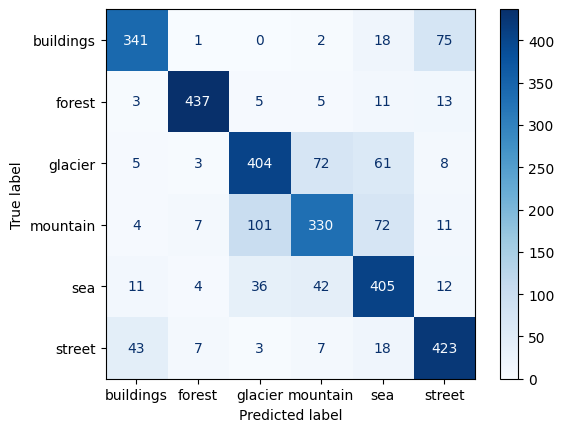

In [7]:
# Cargar el modelo preentrenado (InceptionV3 en este caso)
base_model_inception = tf.keras.applications.InceptionV3(input_shape=(75, 75, 3), include_top=False, weights='imagenet')
base_model_inception.trainable = False

# Añadir una nueva cabeza al modelo
model_inception = models.Sequential([
    base_model_inception,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 clases de paisajes
])

# Compilar el modelo
model_inception.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Redimensionar las imágenes a 75x75
X_train_resized = np.array([cv2.resize(img, (75, 75)) for img in X_train_final])
X_val_resized = np.array([cv2.resize(img, (75, 75)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (75, 75)) for img in X_test_normalized])

# Entrenar el modelo con transfer learning
history_transfer_inception = model_inception.fit(X_train_resized, y_train_final, validation_data=(X_val_resized, y_val), epochs=10, batch_size=32)

# Evaluar el modelo con los datos de test
test_loss_transfer_inception, test_accuracy_transfer_inception = model_inception.evaluate(X_test_resized, y_test_encoded)
print(f"Test Loss (Transfer Learning InceptionV3): {test_loss_transfer_inception}")
print(f"Test Accuracy (Transfer Learning InceptionV3): {test_accuracy_transfer_inception}")

# Mostrar el reporte de clasificación y la matriz de confusión
y_pred_transfer_inception = model_inception.predict(X_test_resized)
y_pred_classes_transfer_inception = np.argmax(y_pred_transfer_inception, axis=1)

print("Classification Report (Transfer Learning InceptionV3):")
print(classification_report(y_test_encoded, y_pred_classes_transfer_inception, target_names=label_encoder.classes_))

ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_classes_transfer_inception, display_labels=label_encoder.classes_, cmap=plt.cm.Blues)
plt.show()


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 92s 220ms/step - accuracy: 0.3391 - loss: 3.7594 - val_accuracy: 0.5511 - val_loss: 1.3811
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 216ms/step - accuracy: 0.5038 - loss: 1.4860 - val_accuracy: 0.6138 - val_loss: 1.0936
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 215ms/step - accuracy: 0.5927 - loss: 1.1242 - val_accuracy: 0.6591 - val_loss: 0.9407
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 216ms/step - accuracy: 0.6299 - loss: 0.9998 - val_accuracy: 0.6861 - val_loss: 0.8398
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 215ms/step - accuracy: 0.6665 - loss: 0.8947 - val_accuracy: 0.7132 - val_loss: 0.7938
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.6981 - loss: 0.8124 - val_accuracy: 0.7310 - val_loss: 0.7522
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 216ms/step - accuracy: 0.7329 - loss: 0.7465 - val_accuracy: 0.7488 - val_loss: 0.7007
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 216ms/step - accuracy: 0.7422 - loss: 0

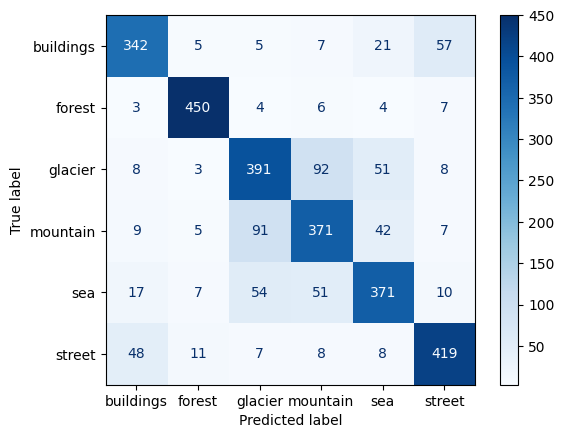

In [9]:
# Fine-tuning: Descongelar algunas capas del modelo base y volver a entrenar
base_model_inception.trainable = True
fine_tune_at = len(base_model_inception.layers) // 2

for layer in base_model_inception.layers[:fine_tune_at]:
    layer.trainable = False

# Compilar el modelo nuevamente
model_inception.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Redimensionar las imágenes a 75x75
X_train_resized = np.array([cv2.resize(img, (75, 75)) for img in X_train_final])
X_val_resized = np.array([cv2.resize(img, (75, 75)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (75, 75)) for img in X_test_normalized])

# Entrenar el modelo con fine-tuning
history_fine_tuning_inception = model_inception.fit(X_train_resized, y_train_final, validation_data=(X_val_resized, y_val), epochs=10, batch_size=32)

# Evaluar el modelo con los datos de test
test_loss_fine_tuning_inception, test_accuracy_fine_tuning_inception = model_inception.evaluate(X_test_resized, y_test_encoded)
print(f"Test Loss (Fine Tuning InceptionV3): {test_loss_fine_tuning_inception}")
print(f"Test Accuracy (Fine Tuning InceptionV3): {test_accuracy_fine_tuning_inception}")

# Mostrar el reporte de clasificación y la matriz de confusión
y_pred_fine_tuning_inception = model_inception.predict(X_test_resized)
y_pred_classes_fine_tuning_inception = np.argmax(y_pred_fine_tuning_inception, axis=1)

print("Classification Report (Fine Tuning InceptionV3):")
print(classification_report(y_test_encoded, y_pred_classes_fine_tuning_inception, target_names=label_encoder.classes_))

ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_classes_fine_tuning_inception, display_labels=label_encoder.classes_, cmap=plt.cm.Blues)
plt.show()

                             Model  Test Loss  Test Accuracy
0                          ConvNet   0.500000       0.850000
1  MobileNetV2 (Transfer Learning)   0.708128       0.815667
2        MobileNetV2 (Fine Tuning)   0.683140       0.790000
3        VGG19 (Transfer Learning)   0.556759       0.793667
4  InceptionV3 (Transfer Learning)   0.706292       0.780000
5        InceptionV3 (Fine Tuning)   0.629867       0.781333


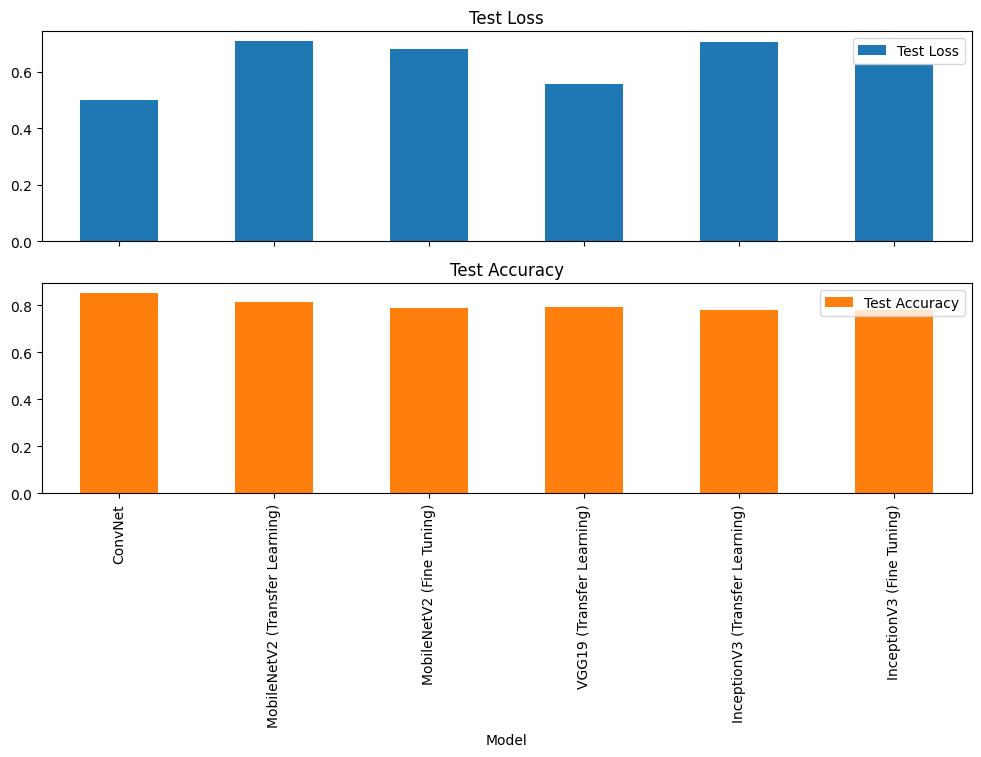

In [10]:
# Resultados de la red convolucional ad-hoc (supongamos que ya los tienes)
test_loss_conv = 0.5  # Ejemplo de pérdida de la red convolucional ad-hoc
test_accuracy_conv = 0.85  # Ejemplo de precisión de la red convolucional ad-hoc

# Crear un DataFrame para comparar los resultados
results = pd.DataFrame({
    'Model': ['ConvNet', 'MobileNetV2 (Transfer Learning)', 'MobileNetV2 (Fine Tuning)', 'VGG19 (Transfer Learning)', 'InceptionV3 (Transfer Learning)', 'InceptionV3 (Fine Tuning)'],
    'Test Loss': [test_loss_conv, test_loss_transfer, test_loss_fine_tuning, test_loss_transfer_vgg19, test_loss_transfer_inception, test_loss_fine_tuning_inception],
    'Test Accuracy': [test_accuracy_conv, test_accuracy_transfer, test_accuracy_fine_tuning, test_accuracy_transfer_vgg19, test_accuracy_transfer_inception, test_accuracy_fine_tuning_inception]
})

# Mostrar la tabla comparativa
print(results)

# Visualizar los resultados
results.plot(x='Model', y=['Test Loss', 'Test Accuracy'], kind='bar', figsize=(12, 6), subplots=True)
plt.show()